# Prediction of Housing Proces

In this project I use different regression models to predict house sale prices based on data collected between May 2014 and May 2015. 

Dataset Link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import calendar
import optuna

from datetime import datetime, date
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

# Read data and remove NaNs

In [2]:
df = pd.read_csv("kc_house_data.csv")
display(df.head(15))
display(df.info())
display(print (df.isna().sum()))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

None

id               0
date             0
price            0
bedrooms         0
bathrooms        0
                ..
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Length: 21, dtype: int64


None

In [3]:
print (df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
                ..
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Length: 21, dtype: int64


# Categroize features as numerical, categorical and explore the data

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='grade', ylabel='price'>

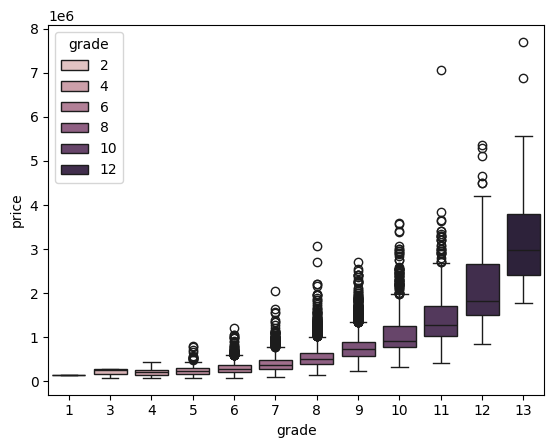

In [5]:
feat_name = 'grade'
sns.boxplot(data=df, x=feat_name,y='price', hue=feat_name)

<Axes: xlabel='lat', ylabel='price'>

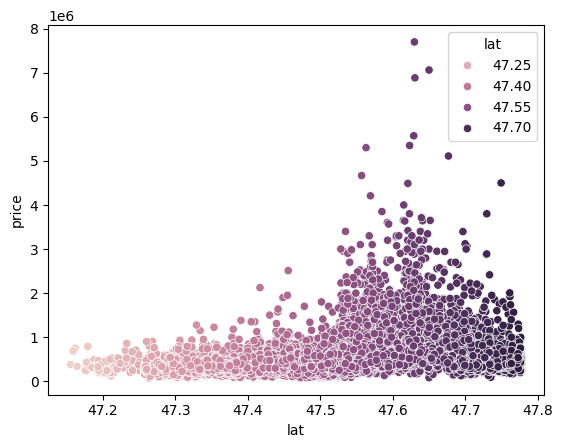

In [6]:
feat_name = 'lat'
sns.scatterplot(data=df, x=feat_name,y='price', hue=feat_name)

In [7]:
df_numerical = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above', 'sqft_basement']].copy()
df_categorical = df[['waterfront','zipcode']].copy()
df_ordinal = df[['view', 'condition', 'grade']].copy()
y = df['price'].values

# Plot Continous Features

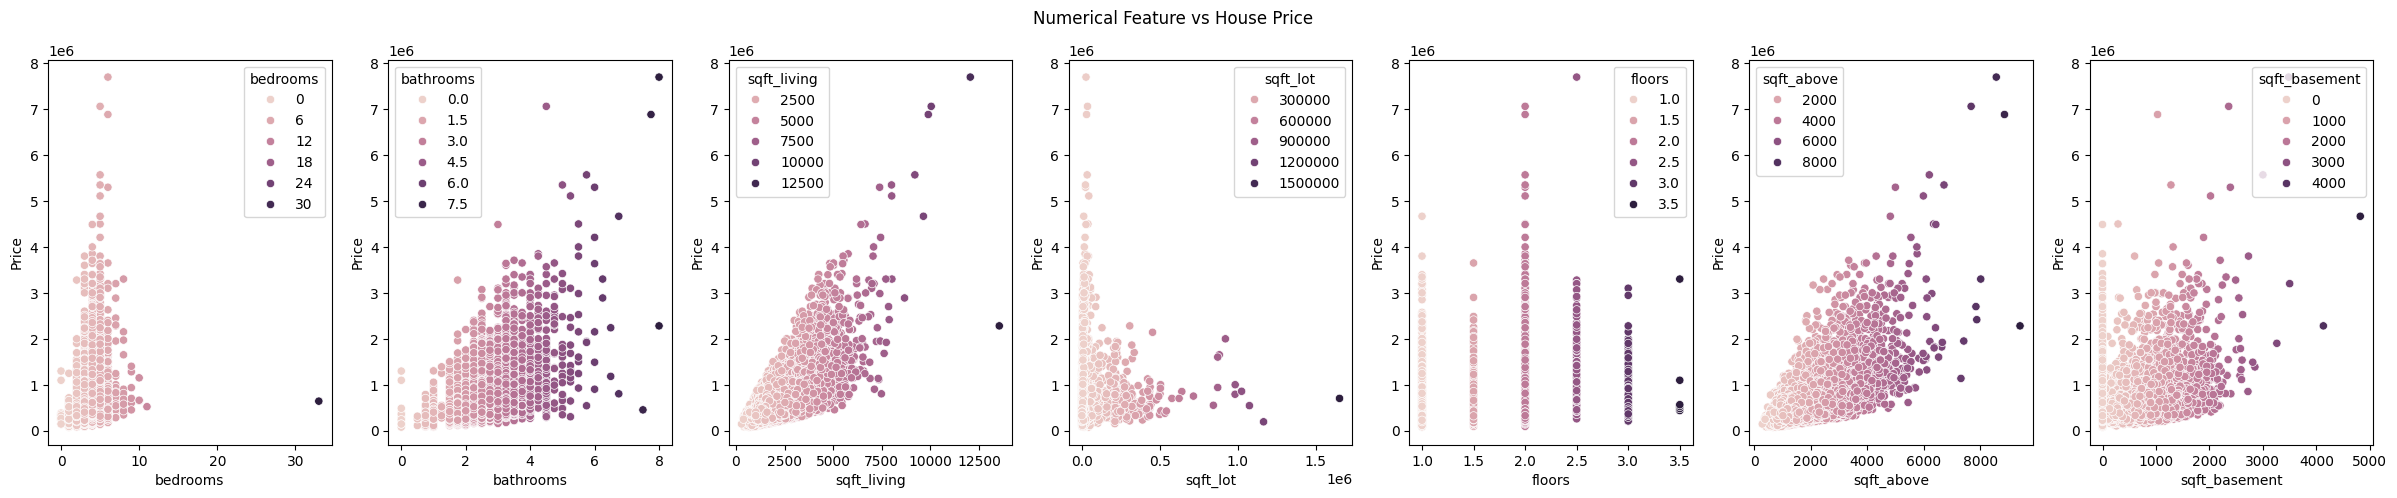

In [8]:
f, axes = plt.subplots(1, len(df_numerical.columns), figsize=(30, 5))
plt.suptitle("Numerical Feature vs House Price")
for idx, feature_name in enumerate(df_numerical.columns):
    pf = sns.scatterplot(data=df_numerical, x=feature_name,y=y,hue=feature_name, ax=axes[idx])
    pf.set(xlabel=feature_name, ylabel="Price")

plt.savefig("NumericalFeatures_vs_HousePrice_ScatterPlot.png")

# Plot Ordinal Features

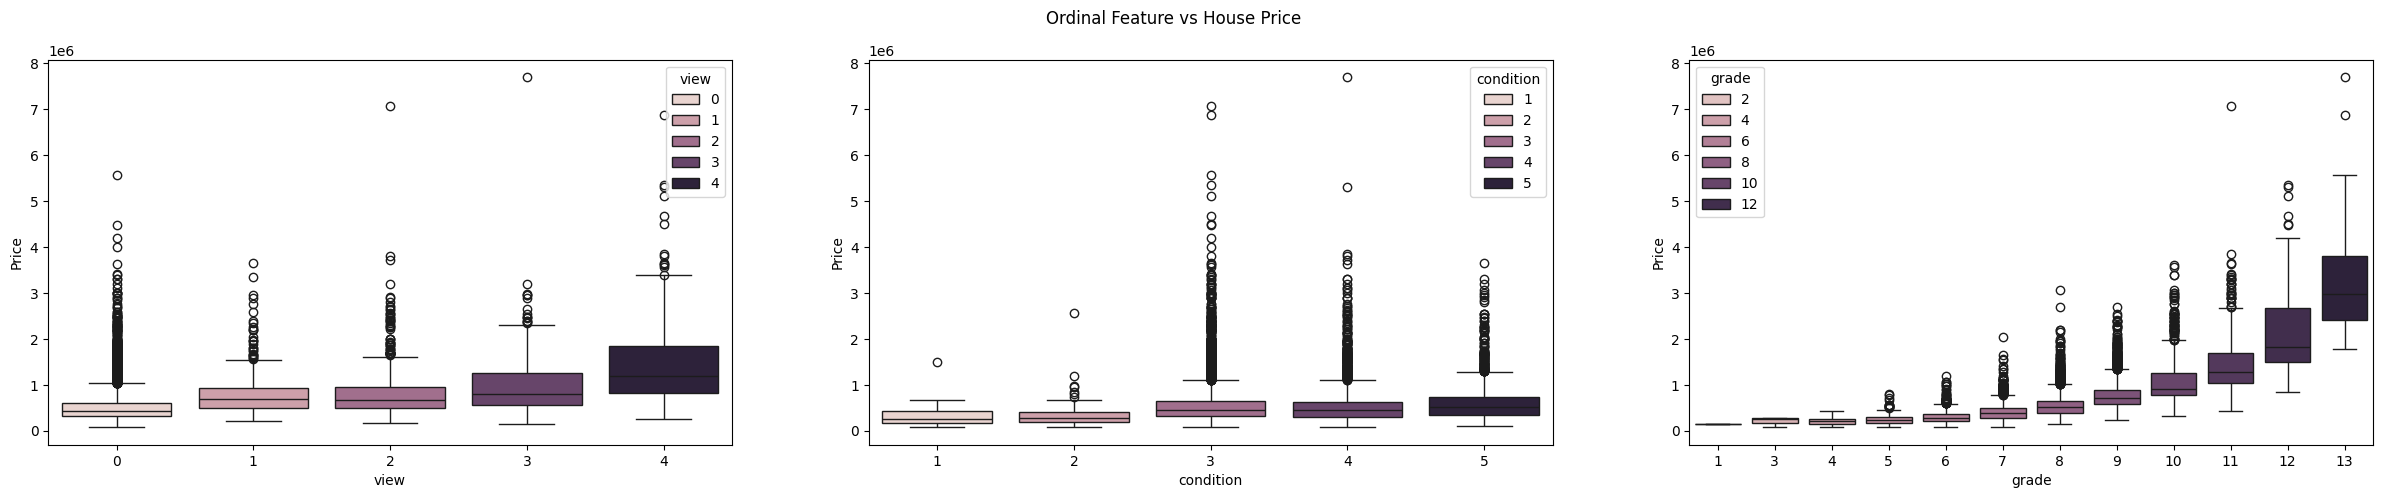

In [9]:
f, axes = plt.subplots(1, len(df_ordinal.columns), figsize=(30, 5))
plt.suptitle("Ordinal Feature vs House Price")
for idx, feature_name in enumerate(df_ordinal.columns):
    pf = sns.boxplot(data=df_ordinal, x=feature_name, y=y, hue=feature_name, ax=axes[idx])
    pf.set(xlabel=feature_name, ylabel="Price")


plt.savefig("OrdinalFeatures_vs_HousePrice_ScatterPlot.png")

# Plor Categorical Features

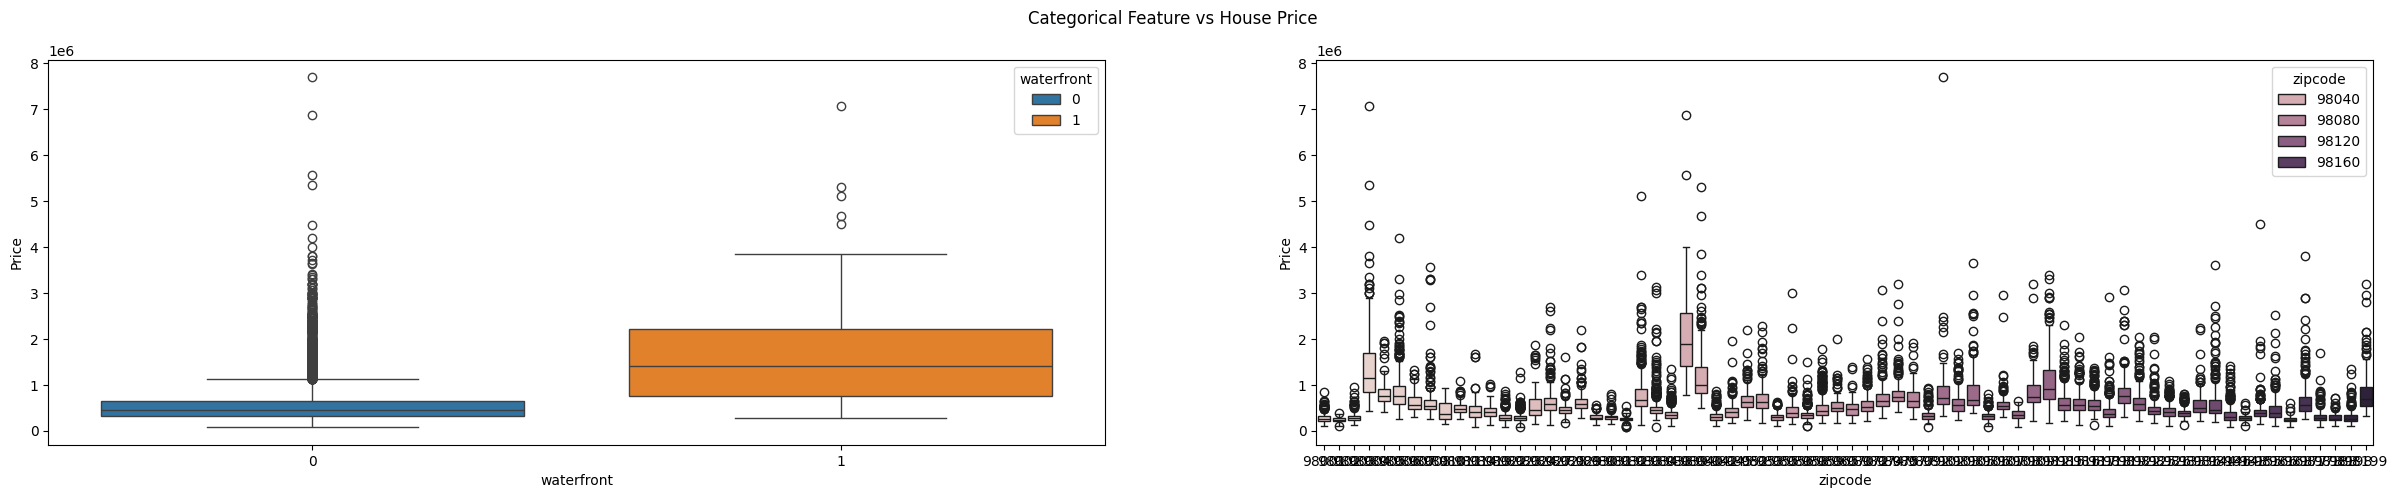

In [10]:
f, axes = plt.subplots(1, len(df_categorical.columns), figsize=(30, 5))
plt.suptitle("Categorical Feature vs House Price")
for idx, feature_name in enumerate(df_categorical.columns):
    pf = sns.boxplot(data=df_categorical, x=feature_name, y=y, hue=feature_name, ax=axes[idx])
    pf.set(xlabel=feature_name, ylabel="Price")

plt.savefig("CategoricalFeatures_vs_HousePrice_ScatterPlot.png")

# Drop features that don't show much correlation with the house price

In [11]:
df_numerical.drop(columns=['bedrooms','sqft_lot','floors'], inplace=True)
df_categorical.drop(columns=['zipcode'], inplace=True)

# Construct the training, validation and test sets

In [12]:
# MinMaxScaler, StandardScaler
num_vals = StandardScaler().fit_transform(df_numerical.values)
ord_vals = StandardScaler().fit_transform(df_ordinal.values)
cat_vals = df_categorical.values
X = np.hstack((num_vals, ord_vals, cat_vals))
y=y.ravel()

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1, random_state=0)

# Define objective funcions for hyperparameter tuning

In [13]:
# Objective function for hyperparameter tuning of DecisionTree
random_state = 42
def objective_dtr(trial, X_train, X_valid, y_train, y_valid):
    params = {
    "criterion": trial.suggest_categorical("criterion", ["squared_error", "absolute_error", "friedman_mse"]),
    "splitter": trial.suggest_categorical("splitter", ["best", "random"]),
    "max_depth": trial.suggest_int("max_depth", 1, 10),
    "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
    "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
    "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),    
    "random_state": random_state,
    }
    
    model = DecisionTreeRegressor(**params).fit(X_train, y_train)
    r2 = model.score(X_valid, y_valid)
    #y_predicted = model.predict(X_valid)
    #rmse = mean_squared_error(y_valid, y_predicted, squared=False)
    
    return r2

In [14]:
# Objective function for hyperparameter tuning of RandomForest
random_state = 42
def objective_rfr(trial, X_train, X_valid, y_train, y_valid):
    params = {
    "n_estimators": trial.suggest_int("n_estimators", 10, 250, step = 10),
    "max_depth": trial.suggest_int("max_depth", 1, 15),
    "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
    "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
    "criterion": trial.suggest_categorical("criterion", ["squared_error", "absolute_error", "friedman_mse"]),
    "random_state": random_state,
    "n_jobs":-1
    }
    
    model = RandomForestRegressor(**params).fit(X_train, y_train)
    r2 = model.score(X_valid, y_valid)
    #y_predicted = model.predict(X_valid)
    #rmse = mean_squared_error(y_valid, y_predicted, squared=False)
    
    return r2

In [15]:
# Objective function for hyperparameter tuning of Support Vector Machine
def objective_svr(trial, X_train, X_valid, y_train, y_valid):
    params = {
    "C": trial.suggest_float("C", 1e-10, 1e10, log=True),
    "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "sigmoid"]),
    "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
    "max_iter": 10000
    }
    
    model = SVR(**params).fit(X_train, y_train)
    r2 = model.score(X_valid, y_valid)
    #y_predicted = model.predict(X_valid)
    #rmse = mean_squared_error(y_valid, y_predicted, squared=False)
    
    return r2

# Train and test the regression models

In [ ]:
optuna.logging.set_verbosity(optuna.logging.INFO)
optuna.logging.set_verbosity(optuna.logging.WARNING)

# DecisionTreeRegressor
study_dtr = optuna.create_study(direction = "maximize")
func = lambda trial: objective_dtr(trial, X_train, X_valid, y_train, y_valid)
study_dtr.optimize(func, n_trials = 100, timeout=600)
model = DecisionTreeRegressor(**study_dtr.best_trial.params).fit(X_train_valid, y_train_valid)
dectree_r2 = model.score(X_test, y_test)
print("DecisionTreeRegressor R2 =", dectree_r2)

In [ ]:
# RandomForestRegressor
study_rfr = optuna.create_study(direction = "maximize")
func = lambda trial: objective_rfr(trial, X_train, X_valid, y_train, y_valid)
study_rfr.optimize(func, n_trials = 100, timeout=600)
model = RandomForestRegressor(**study_rfr.best_trial.params).fit(X_train_valid, y_train_valid)
randfor_r2 = model.score(X_test, y_test)
print("RandomForestRegressor Tree R2 =", randfor_r2)

In [ ]:
# SVR
study_svr = optuna.create_study(direction = "maximize")
func = lambda trial: objective_svr(trial, X_train, X_valid, y_train, y_valid)
study_svr.optimize(func, n_trials = 100, timeout=600)
model = SVR(**study_svr.best_trial.params).fit(X_train_valid, y_train_valid)
svr_r2 = model.score(X_test, y_test)
print("SVR Tree R2 =", svr_r2)

In [ ]:
print("DecisionTreeRegressor R2 =", dectree_r2)
print("RandomForestRegressor Tree R2 =", randfor_r2)
print("SVR Tree R2 =", svr_r2)